# Data Exploration

**Author:** Axel Daniel Malváez Flores   
**Date:** 2024-01-09

This notebook is intended to explore the data and get some insights about it. It's just an initial exploration, so I'm trying to familiarize with the data and get some ideas.

* Needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable

* Retrieving the data

In [2]:
data = pd.read_csv('../../1. Data/smaller_sample.csv')
data.head(30)

,customer_id,account_id,stage,ed_id,event_name,event_timestamp,journey_steps_until_end,journey_id,milestone_number
0,2.787130e+08,-1812321640,Discover,2,campaign_click,2021-05-31 06:00:00,1,1.0,NaN
1,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:03,2,1.0,NaN
2,2.787130e+08,-1812321640,Apply for Credit,3,application_web_submit,2021-05-31 23:11:51,3,1.0,NaN
3,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:51,4,1.0,NaN
4,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:51,5,1.0,NaN
5,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:54,6,1.0,NaN
6,2.787130e+08,-1812321640,Apply for Credit,3,application_web_submit,2021-05-31 23:12:37,7,1.0,NaN
7,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:12:37,8,1.0,NaN
8,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:12:40,9,1.0,NaN
9,2.787130e+08,-1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:12:40,10,1.0,NaN


## Data Types Modifications

### Timestamp

First we start by changing the column event_timestamp from object to datetime.

In [3]:
# Assigning the iso format to have all the timestamps homogenized
data['event_timestamp'] = pd.to_datetime(data['event_timestamp']) #, format='ISO8601')

ValueError: unconverted data remains when parsing with format "%Y-%m-%d %H:%M:%S": ".253", at position 15. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

### ID's to positive numbers & customer_id to int

* Positive Numbers

Set all the account_ids as a positive number

In [ ]:
def remove_if(a):
    if a[0] == '-':
        return a[1:]
    else:
        return a

In [ ]:
# Setting positive values for account_ids
data['account_id'] = data['account_id'].apply(lambda x : (-1)*x if x < 0 else x).astype('int64')

# Setting positive values for customer_ids
data['customer_id'] = data['customer_id'].apply(lambda x : (-1)*x if x < 0 else x).astype('int64')

### Verifying the sequential data is indeed sequential for the journey steps

* Function to verify

In [ ]:
def has_correct_sequence(s):
    s = list(s)
    temp = s[0]
    for i in range(1, len(s)):
        if s[i] == temp+1:
            temp = s[i]
        elif s[i] == 1:
            temp = 1
        else :
            print('error because temp is ', temp, ' and x[i] is ', s[i])
            print('i is ', i)
            return False
    return True

* Checking if que have complete sequential data in the journey steps.

In [ ]:
x = data['journey_steps_until_end']

print('is_correct_sequence(x) is ', has_correct_sequence(x))

is_correct_sequence(x) is  True


We can conclude that the sequences in the journey steps are complete sequences, so we can use them to train a model.

* Counting the sequences of data

In [ ]:
x = data['journey_steps_until_end']

counter = 0
temp = x[0]
for i in range(1, len(x)):
    if x[i] == temp+1:
        temp = x[i]
    elif x[i] == 1:
        counter += 1
        temp = 1

print('counter is ', counter)

counter is  86708


* Journey Steps Until End Distribution

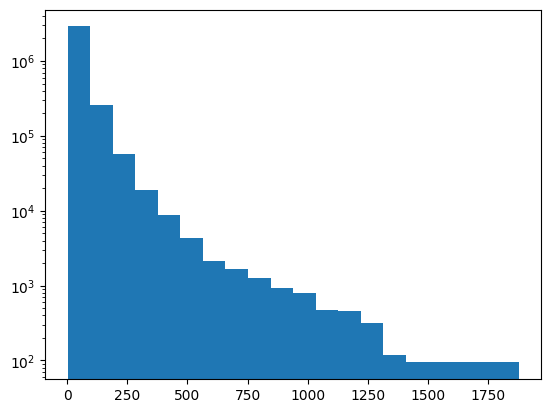

In [ ]:
plt.hist(data['journey_steps_until_end'], bins=20)
plt.yscale('log')

* Example for customer with id -865005459

In [ ]:
custid = data[data['account_id'] == 1812321640]
len(custid)

16

### Droping duplicates

* What does an instance need to be considered duplicated?

We will be considering a duplicated instance if the accound_id, event_name and event_timestamp are the same for that and many other instances.

In [ ]:
x = len(data) - len(data.drop_duplicates(subset=['account_id', 'event_name', 'event_timestamp']))

print('We are dropping ', x, ' rows because they are duplicates')

We are dropping  397199  rows because they are duplicates


* Which are the duplicates?

In [ ]:
idx_dups = data.duplicated(subset=['account_id', 'event_name', 'event_timestamp'])
data.loc[idx_dups, :].head(11)

,customer_id,account_id,stage,ed_id,event_name,event_timestamp,journey_steps_until_end,journey_id,milestone_number
4,278713037,1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:51,5,1.0,NaN
9,278713037,1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:12:40,10,1.0,NaN
13,278713037,1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:12:53,14,1.0,NaN
18,1860728936,834400242,Apply for Credit,19,application_web_view,2022-11-18 06:15:41,2,1.0,NaN
21,1860728936,834400242,Apply for Credit,19,application_web_view,2022-11-18 06:15:46,5,1.0,NaN
22,1860728936,834400242,Apply for Credit,19,application_web_view,2022-11-18 06:15:46,6,1.0,NaN
25,1860728936,834400242,Apply for Credit,19,application_web_view,2022-11-18 06:16:20,9,1.0,NaN
27,1860728936,834400242,Apply for Credit,19,application_web_view,2022-11-18 06:17:24,11,1.0,NaN
28,1860728936,834400242,Apply for Credit,19,application_web_view,2022-11-18 06:17:24,12,1.0,NaN
33,1860728936,834400242,Apply for Credit,19,application_web_view,2022-11-18 06:17:51,17,1.0,NaN


* Getting rid of them

In [ ]:
data.drop_duplicates(subset=['account_id', 'event_name', 'event_timestamp'], inplace=True)
data.reset_index(drop=True, inplace=True)

In [ ]:
data.head(10)

,customer_id,account_id,stage,ed_id,event_name,event_timestamp,journey_steps_until_end,journey_id,milestone_number
0,278713037,1812321640,Discover,2,campaign_click,2021-05-31 06:00:00,1,1.0,NaN
1,278713037,1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:03,2,1.0,NaN
2,278713037,1812321640,Apply for Credit,3,application_web_submit,2021-05-31 23:11:51,3,1.0,NaN
3,278713037,1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:51,4,1.0,NaN
4,278713037,1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:54,6,1.0,NaN
5,278713037,1812321640,Apply for Credit,3,application_web_submit,2021-05-31 23:12:37,7,1.0,NaN
6,278713037,1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:12:37,8,1.0,NaN
7,278713037,1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:12:40,9,1.0,NaN
8,278713037,1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:12:41,11,1.0,NaN
9,278713037,1812321640,Apply for Credit,3,application_web_submit,2021-05-31 23:12:53,12,1.0,NaN


But now another problem arises beause the *journey_steps_until_end* variable is not sequential anymore, and therefore we need to mitigate this problem.

before [1,2,4,5,6,7,1,2,5,6,7,8,12,1,2,3,1,2,3,1,1]   
after [1,2,3,4,5,6,1,2,3,4,5,6,7,1,2,3,1,2,3,1,1]

* Verifying if we have correct sequences (we are expecting a False value)

In [ ]:
has_correct_sequence(data['journey_steps_until_end'])

error because temp is  4  and x[i] is  6
i is  4


False

* Correction of the sequences

In [ ]:
def correct_sequences(s):
    seq = list(s)
    temp = s[0]
    for i in range(1, len(seq)):
        # if 1 then start again
        if seq[i] == 1:
            temp = 1
        elif seq[i] == temp+1:
            temp = seq[i]
        else :
            seq[i] = temp+1
            temp = seq[i]
    return seq

In [ ]:
j_steps = data['journey_steps_until_end']
s_corrected = correct_sequences(j_steps)

print('is_correct_sequence(s_corrected) is ', has_correct_sequence(s_corrected))

is_correct_sequence(s_corrected) is  True


* Now that the sequences are corrected, then we can substitute the values of the journey_steps_until_end with the correct ones.

In [ ]:
data['journey_steps_until_end'] = s_corrected
data.head()

,customer_id,account_id,stage,ed_id,event_name,event_timestamp,journey_steps_until_end,journey_id,milestone_number
0,278713037,1812321640,Discover,2,campaign_click,2021-05-31 06:00:00,1,1.0,NaN
1,278713037,1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:03,2,1.0,NaN
2,278713037,1812321640,Apply for Credit,3,application_web_submit,2021-05-31 23:11:51,3,1.0,NaN
3,278713037,1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:51,4,1.0,NaN
4,278713037,1812321640,Apply for Credit,19,application_web_view,2021-05-31 23:11:54,5,1.0,NaN


## 5) What time-period is covered? When are "busiest" times?

### Coverage

We call the min and the max functions in order to know the period this data covers.

In [ ]:
min_date = data['event_timestamp'].min()
max_date = data['event_timestamp'].max()

print('This data covers from {} to {}'.format(min_date, max_date))

This data covers from 2020-11-04 10:26:59 to 2023-09-20 11:57:56


### Busiest times

Now what we're going to do is to group the data by hour, day and month to see the busiest times.

* Hour

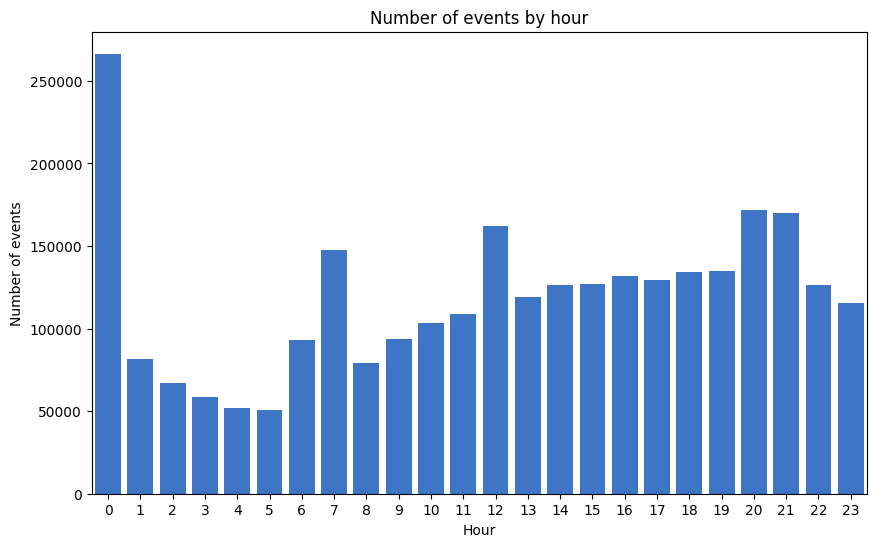

In [ ]:
hours = data['event_timestamp'].dt.hour
counts = hours.value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=counts.index, y=counts.values, color='#2970DB')
plt.title('Number of events by hour')
plt.xlabel('Hour')
plt.ylabel('Number of events')
plt.show()

* Day

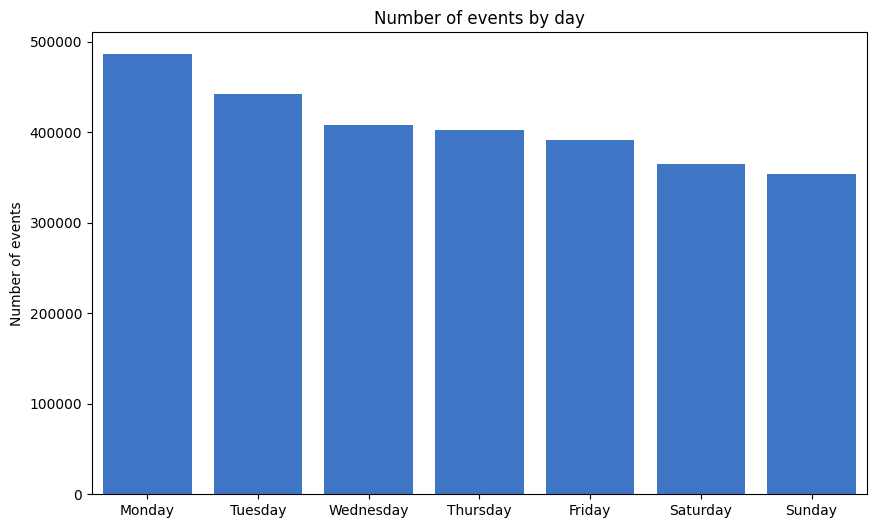

In [ ]:
dayow = data['event_timestamp'].dt.dayofweek
daysofweek = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
sns.barplot(x=daysofweek, y=dayow.value_counts().values, color='#2970DB')
plt.title('Number of events by day')
plt.ylabel('Number of events')
plt.show()

* Month

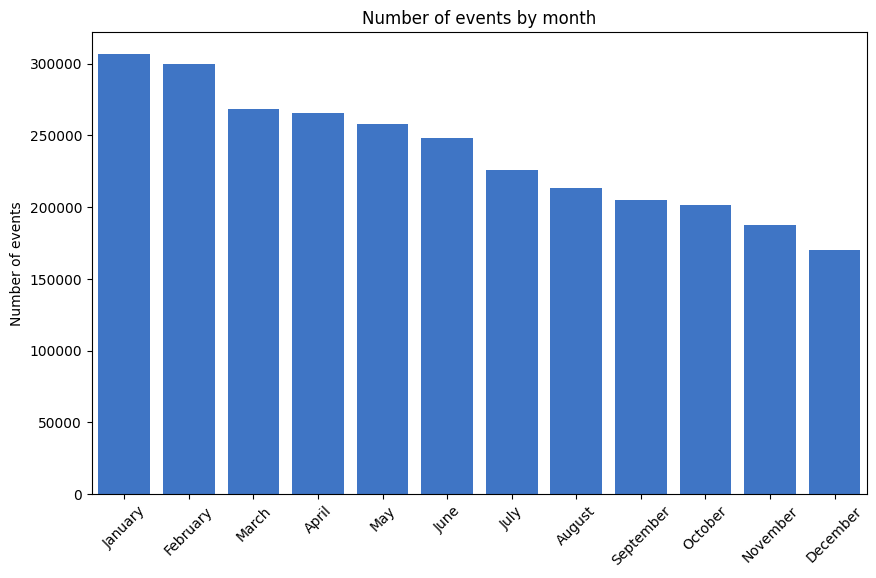

In [ ]:
month = data['event_timestamp'].dt.month
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October',
          'November', 'December']

plt.figure(figsize=(10, 6))
sns.barplot(x=months, y=month.value_counts().values, color='#2970DB')
plt.title('Number of events by month')
plt.ylabel('Number of events')
plt.xticks(rotation=45)
plt.show()

## Most common events

/var/folders/8l/f787_tgj7sg6grwn27dvfx0h0000gn/T/ipykernel_6855/162467107.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=data['event_name'].value_counts().values, y=data['event_name'].value_counts().index, palette='viridis')


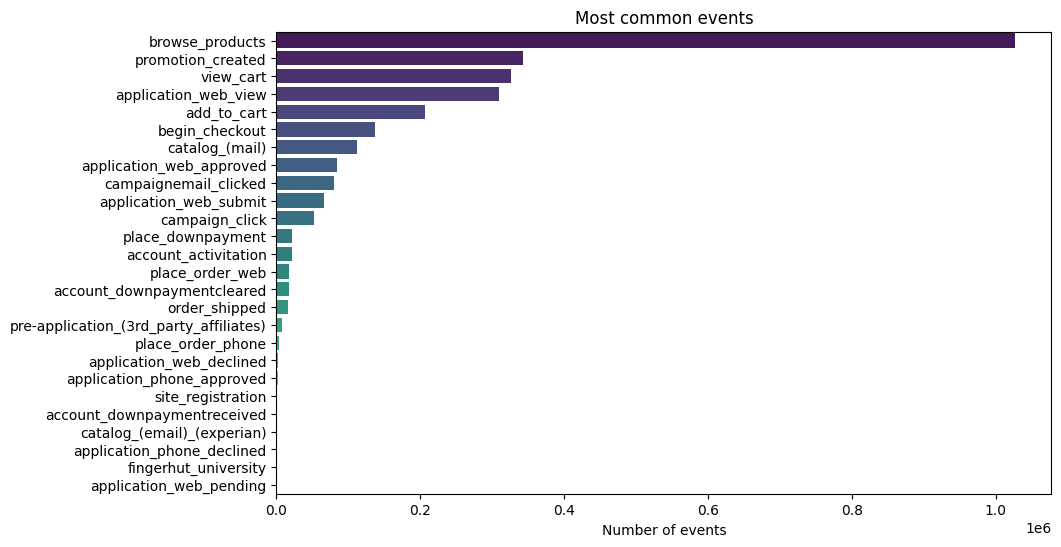

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=data['event_name'].value_counts().values, y=data['event_name'].value_counts().index, palette='viridis')
plt.title('Most common events')
plt.xlabel('Number of events')
plt.ylabel('')
#plt.xscale('log')
plt.show()

In [ ]:
zerohour = data[data['event_timestamp'].dt.hour == 0]
zerohour_event = zerohour['event_name']

In [ ]:
data[data['event_name'] == 'catalog_(mail)']['event_timestamp'].dt.hour.value_counts()

event_timestamp
0    111485
Name: count, dtype: int64

/var/folders/8l/f787_tgj7sg6grwn27dvfx0h0000gn/T/ipykernel_6855/3577960775.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=zerohour_event.value_counts().values, y=zerohour_event.value_counts().index, palette='viridis')


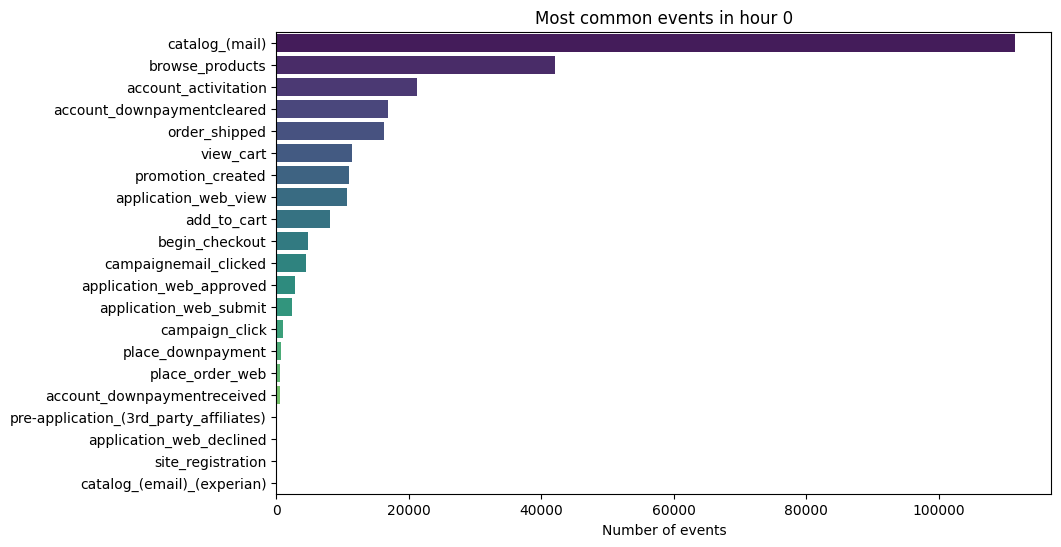

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=zerohour_event.value_counts().values, y=zerohour_event.value_counts().index, palette='viridis')
plt.title('Most common events in hour 0')
plt.xlabel('Number of events')
plt.ylabel('')
#plt.xscale('log')
plt.show()